# Project 1: COMP 110 Data Analysis
__author__ = "730328302"

In [4]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your work in other modules!")

Autoreload of imported modules enabled. Be sure to save your work in other modules!


# Hypothesis: 
## I believe that students who complete lessons on time are more likely to percieve the pace of the course as being slower than those who complete lessons later. Furthermore, I believe that how soon students complete lessons has very little to do with whether they will reccomend the class or not. Therefore, my hypothesis is:

***How soon students complete the lessons is a better predictor of what the percieved pace of the class is, than it is of how likely students are to recommend the class.***

In [5]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

### Then, I will read in the csv using the `read_csv_rows` function from `data_utils`. After that I will re-oriented the data from row-based to column-based using the function `columnar`, also from `data_utils`. 

 Note: `data_cols` refers to the data after it has been column-oriented.

In [6]:
from data_utils import read_csv_rows, columnar, select

data_in_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)
data_cols: dict[str, list[str]] = columnar(data_in_rows)



## Data Preview

### Following that I will select the specific data I wish to be working with, (in this case, the `lesson_time`, `pace`, and `would_reccomend` columns) using the `select` function. 

### Then, I will create a "preview" of the data to make sure it has been read and oriented correctly, and that the right columns have been selected. Using `tabulate` I will put the data in a table format.

In [7]:

from data_utils import select, head
from tabulate import tabulate
selected_data: dict[str, list[str]] = select(data_cols, ["lesson_time", "pace", "would_recommend"])
data_preview: dict[str, list[str]] = head(selected_data, 10)
data_preview
tabulate(data_preview, data_preview.keys(), "html")


lesson_time,pace,would_recommend
5,5,7
4,5,7
2,5,7
2,6,7
3,5,7
6,5,4
2,6,6
7,5,4
6,4,6
2,7,5


To make things easier on my helper functions, I will first convert the data to float values.

In [103]:
from data_utils import convert_to_float
convert_to_float(selected_data["lesson_time"])
convert_to_float(selected_data["pace"])
convert_to_float(selected_data["would_recommend"])
print("values are now floats!")


values are now floats!


## Basic Analysis

### Then I will make some basic analysis of the data by finding the `mean`, `median`, `mode`, and  `standard deviation` of the three selected columns, and organizing it into tables.

In [10]:
from data_utils import mean, median, mode, std_dev
from typing import Union

lesson_time_analysis: dict[str, Union[float, list[float], str]] = {}
pace_analysis: dict[str, Union[float, list[float], str]] = {}
reccomend_analysis: dict[str, Union[float, list[float], str]] = {} 

lesson_time_analysis["mean"] = (mean(selected_data["lesson_time"]))
lesson_time_analysis["median"] = (median(selected_data["lesson_time"]))
lesson_time_analysis["mode"] = mode(selected_data["lesson_time"])
lesson_time_analysis["standard dev"] = (std_dev(selected_data["lesson_time"]))

pace_analysis["mean"] = mean(selected_data["pace"])
pace_analysis["median"] = median((selected_data["pace"]))
pace_analysis["mode"] = mode(selected_data["pace"])
pace_analysis["standard dev"] = std_dev(selected_data["pace"])

reccomend_analysis["mean"] = mean(selected_data["would_recommend"])
reccomend_analysis["median"] = median(selected_data["would_recommend"])
reccomend_analysis["mode"] = mode(selected_data["would_recommend"])
reccomend_analysis["standard dev"] = std_dev((selected_data["would_recommend"]))


print(f" lesson time:     {lesson_time_analysis}")
print(f" pace:            {pace_analysis}")
print(f" would reccomend: {reccomend_analysis}")

 lesson time:     {'mean': 4.523560209424084, 'median': 5.0, 'mode': ['6'], 'standard dev': 1.8419202363479432}
 pace:            {'mean': 5.2582897033158815, 'median': 5.0, 'mode': ['5'], 'standard dev': 1.077292190737214}
 would reccomend: {'mean': 5.481675392670157, 'median': 6.0, 'mode': ['7'], 'standard dev': 1.4507625725406679}


## Plotting Data

### First I will compare the `pace` column to the `would_recommend` column by creating a scatterplot with the former as the x-axis and the latter as the y-axis. After that, I will calculate the correlation coefficient between the two variables using the function `r_values` I created in `data_utils`.

Note: to be able to use the `r_values` function, I had to convert the data in the columns to floats using the `convert_to_float` function

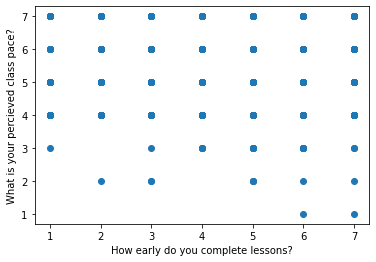

r is: -0.05564314246929406


In [28]:
import matplotlib.pyplot as plt
from data_utils import convert_to_float
x = convert_to_float(selected_data["lesson_time"])
y = convert_to_float(selected_data["pace"])
plt.scatter(x, y)
plt.xlabel("How early do you complete lessons?")
plt.ylabel("What is your percieved class pace?")
plt.show()

convert_to_float(selected_data["pace"])
convert_to_float(selected_data["would_recommend"])

correlation_coefficient: float = r_value(convert_to_float(selected_data["lesson_time"]),convert_to_float(selected_data["pace"]))

print(f"r is: {correlation_coefficient}")

### Then, I will compare the `lesson_time` column to the `would_recommend` column by creating a scatterplot with the former as the x-axis and the latter as the y-axis. After that, I will calculate the correlation coefficient between the two variables using the function `r_values` I created in `data_utils`.

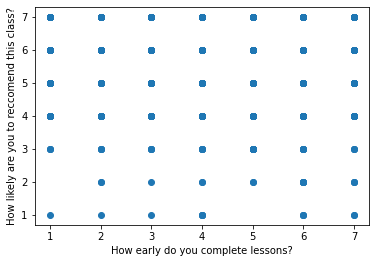

 r is 0.01757980638427289


In [27]:
import matplotlib.pyplot as plt
from data_utils import convert_to_float, r_value
x = convert_to_float(selected_data["lesson_time"])
y = convert_to_float(selected_data["would_recommend"])
plt.scatter(x, y)
plt.xlabel("How early do you complete lessons?")
plt.ylabel("How likely are you to reccomend this class?")
plt.show()

convert_to_float(selected_data["lesson_time"])
convert_to_float(selected_data["would_recommend"])

correlation_coefficient_a: float = r_value(convert_to_float(selected_data["lesson_time"]),convert_to_float(selected_data["would_recommend"]))
print(f" r is {correlation_coefficient_a}")

# Conclusion and Final Analysis

### Seeing as the r value for case 